[300.         299.07764656 298.15497311 297.23197967 296.30866622
 295.38503278 294.46107933 293.53680589 292.61221244 291.687299
 290.76206555 289.83651211 288.91063866 287.98444522 287.05793177
 286.13109833 285.20394488 284.27647144 283.34867799 282.42056455
 281.4921311  280.56337766 279.63430421 278.70491077 277.77519732
 276.84516388 275.91481043 274.98413699 274.05314355 273.1218301
 272.19019666 271.25824321 270.32596977 269.39337632 268.46046288
 267.52722943 266.59367599 265.65980254 264.7256091  263.79109565
 262.85626221 261.92110876 260.98563532 260.04984187 259.11372843
 258.17729498 257.24054154 256.30346809 255.36607465 254.4283612 ]
[[ 1.     0.     0.    ...  0.     0.     0.   ]
 [ 1.    -2.     1.    ...  0.     0.     0.   ]
 [ 0.     1.    -2.    ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ... -2.     1.     0.   ]
 [ 0.     0.     0.    ...  1.    -2.     1.   ]
 [ 0.     0.     0.    ...  0.    -1.     1.004]]
[ 3.0e+02 -3.2e-04 -3.2e-04 -3.2e-04 -3.2e

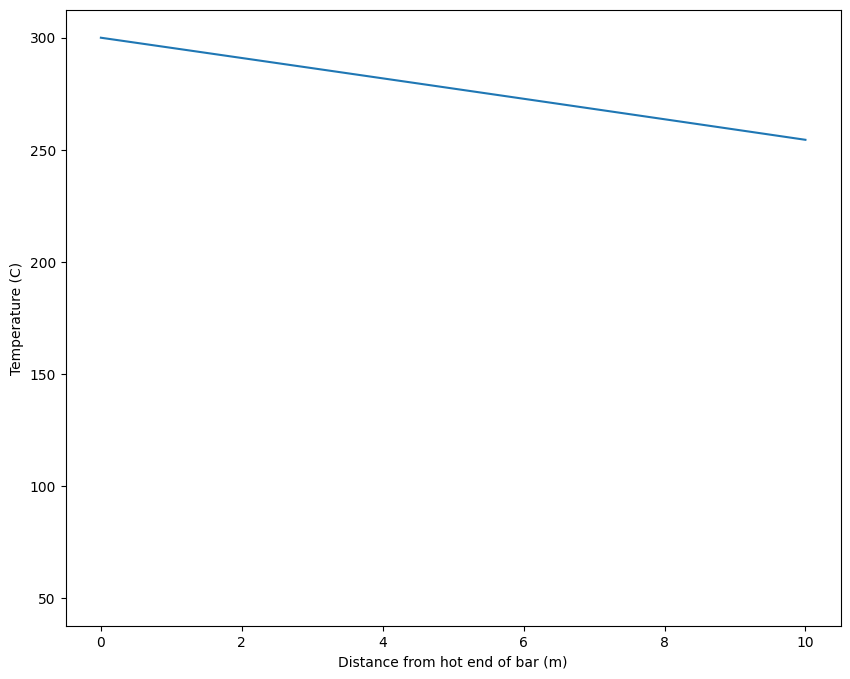

In [26]:
# importing modules for matrix and plotting
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

# defining material properties
LBar   =         10     # length of bar: meters
kCond  =         250    # thermal conductivity: W/m/C
hConv  =         5      # convection coefficient: W/m^2/C
xsInit =         0.1    # initial cross-section area: m^2
xsFin  =         0.05   # final cross-section area: m^2
Tair   =         20     # air temp: Celsius
n      =         50     # number of sections
sHeat  =         2      # heat gen per unit length: W/m
sHeatF =         10     # heat gen variable by length: W/m
# boundary condition
Tinit  =         300    # initial bar temp: C


dx = LBar/(n)
dx2 = dx*dx

# setting up LHS matrix
LM = np.zeros((n,n))

# defining initial value
LM[0,0]  = 1
LM[-1,-1]  = 1


# defining 2nd row
LM[1,0]  =  1
LM[1,1]  = -2
LM[1,2]  =  1

# defining 2nd to last row
LM[-2,-1]  =  1
LM[-2,-2]  = -2
LM[-2,-3]  =  1

# for loop
for i in range(2, n-2):
    LM[i,i-1] =  1
    LM[i,i]   = -2
    LM[i,i+1] =  1


# defining the last row
LM[-1,-1] = 1 + (hConv *dx/kCond)
LM[-1,-2] = -1
#variation of cross sectional area

# array of steps for area
Area = np.linspace(xsInit, xsFin, n-1)



# matrix b
#b = np.full(n, ((sHeat/(kCond*xsInit)))*12*(dx**2))
### testing different b
b = np.full(n, ((-sHeat/(kCond))*(dx2)))
b[0]  = 300
b[1]  = ((-sHeat/(kCond))*(dx2))
b[-2]  = ((-sHeat/(kCond))*(dx2))
b[-1] = (hConv*dx/kCond)*Tair


# solve the linear equation
vectors = np.linalg.solve(LM, b)


print(vectors)
print(LM)
print(b)
print(Area)
### TEST ###
xvals = np.linspace(0, 10, n)

plt.figure(figsize=(10,8))
plt.plot(xvals, vectors)
plt.plot(5, 50)
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()